In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

%matplotlib inline


df = pd.read_excel("/Users/seojunebeom/Desktop/대학교/2022 1학기/기계학습/R3 fbprophet 성능평가 데이터/S&P.xlsx",index_col=0)
df




,yhat,종가,MA,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,날짜,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
ds,,,,,,,,,,,,,,,,,
2000-01,1420.681162,1455.2,34.518838,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,1422.233736,1399.4,22.833736,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,1422.678080,1402.1,20.57808,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,1422.985556,1403.5,19.485556,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,1422.781982,1441.5,18.718018,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,4341.582901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,4342.970832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,4343.449234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#fbprophet 사용 형식에 맞추기

df_tmp = pd.DataFrame({"ds":df["날짜"], "y":df["종가"], "yhat":df["yhat"]})
df_target = df_tmp[:-1]	# 끝에 NaN 값을 제거함

df = df_target.copy()
df["ds"] = pd.to_datetime(df_target["ds"], format="%Y-%m-%d")

# .info()로 확인하면 object이기 때문에 숫자로 바꿔줌
df["y"] = df["y"].astype("float")
df["yhat"] = df["yhat"].astype("float")

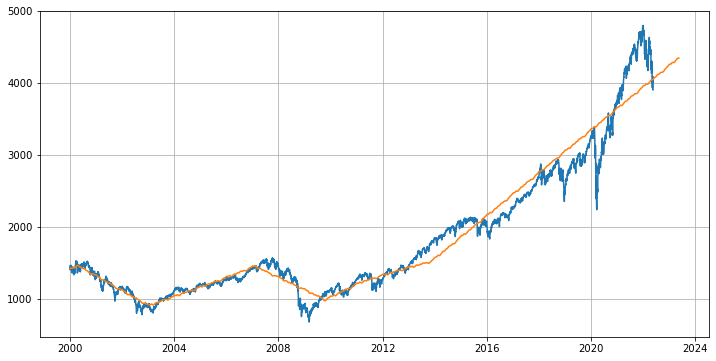

In [3]:
#fbprophet 과 실제 데이터 성능평가 비교

plt.figure(figsize=(12,6))
plt.plot(df["ds"], df["y"], label="real")
plt.plot(df["ds"], df["yhat"], label='real')
plt.grid(True)
plt.show()


In [4]:
#2000년~2021년 데이터 필터링

df_filtered = df.query('"2000-01-03"<= ds <= "2021-12-31"')['y']

#2022년 하반기 데이터 예측값범위생성& 2022년 하반기 평균데이터 출력
df_ha22 = df.query('"2022-07-01"<= ds <= "2022-12-31"')
avg22ha = df_ha22['yhat'].mean()

print(avg22ha)


#2022년 데이터 예측값범위생성& 2022년 평균데이터 출력
df_whole22 = df.query('"2020-01-04"<= ds <= "2022-12-31"')
avg22whole = df_whole22['yhat'].mean()

print(avg22whole)

4161.561765257216
3821.8241626193008


In [5]:
df_filtered

ds
2000-01    1455.20
NaN        1399.40
NaN        1402.10
NaN        1403.50
NaN        1441.50
            ...   
NaN        4791.19
NaN        4786.36
NaN        4793.06
NaN        4778.73
NaN        4766.18
Name: y, Length: 5536, dtype: float64

In [6]:
stock_max =df_filtered.max()
stock_min =df_filtered.min()

print(stock_max)
print(stock_min)

stock_tick = 255/(stock_max - stock_min)
stock_tick

4793.06
676.53


0.06194537632423423

In [7]:
rgb22ha = (avg22ha - stock_min)*stock_tick
rgb22whole = (avg22whole - stock_min)*stock_tick

print(rgb22ha)
print(rgb22whole)


215.88160420076863
194.83643055386975
